<a href="https://colab.research.google.com/github/surendra-crax/120Days-DataScience/blob/main/Day10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# Scatter Plot:
⭐ 1. A scatter plot shows the relationship between two numeric columns.

Each dot = one passenger.

For Titanic:

- x-axis → Age

- y-axis → Fare

Each point tells you:

"This passenger of Age X paid Fare Y"

⭐ 2. Why do we use it?

Because scatter plots help us see:

✔ patterns

✔ correlations

✔ clusters

✔ unusual values

✔ outliers

This is extremely important in data analysis.

⭐ 3. Understanding the relationship (Age vs Fare)

Think logically:

- Older passengers might have paid more (maybe 1st class)

- Younger might pay less

- Some fares are extremely high (we already cleaned outliers earlier)

Scatter plot will show visually:

✔ Are high fares associated with adults?

✔ Do kids have cheaper tickets?

✔ Are there specific age groups clustered at certain fare levels?

This gives human insight into the data.

⭐ 4. How to read the scatter plot

When you see:

🔹 Upward trend → older passengers pay more

🔹 Downward trend → older passengers pay less

🔹 No trend → age and fare unrelated

🔹 Dense clusters → common price ranges

🔹 Isolated dots → outliers

Scatter = pattern finder.

In [3]:
from google.colab import files
uploaded = files.upload()
import pandas as pd



Saving titanic_cleaned.csv to titanic_cleaned.csv


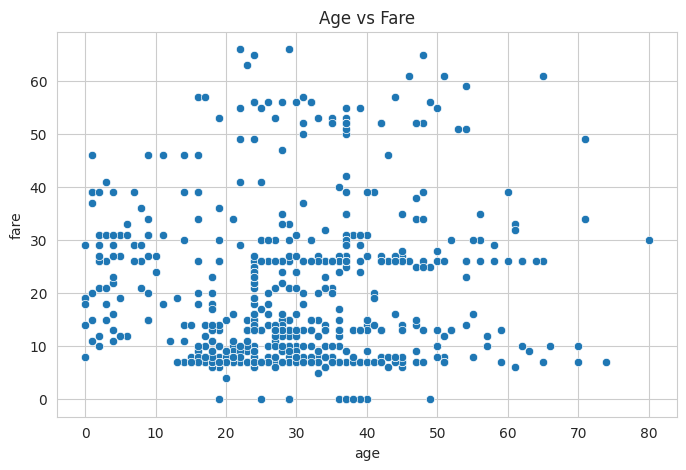

In [4]:
df = pd.read_csv("titanic_cleaned.csv")
plt.figure(figsize=(8,5))
sns.scatterplot(x="age",y="fare",data=df)
plt.title("Age vs Fare")
plt.show()

“Age and Fare have no clear relationship; the points are widely scattered without a pattern. Fare is influenced more by passenger class and ticket type than by age.”

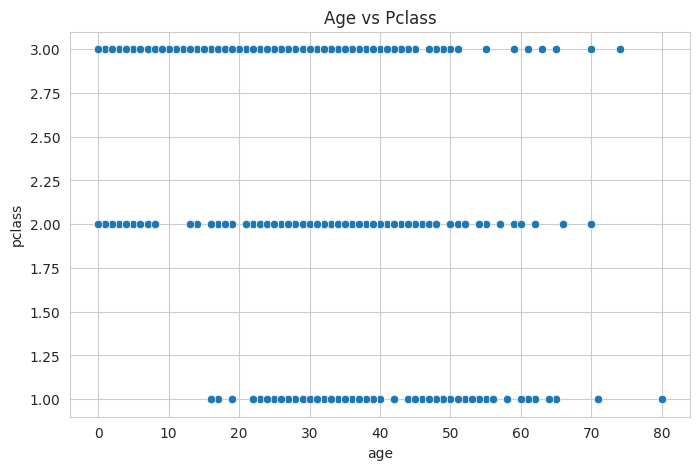

In [5]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="age",y="pclass",data=df)
plt.title("Age vs Pclass")
plt.show()


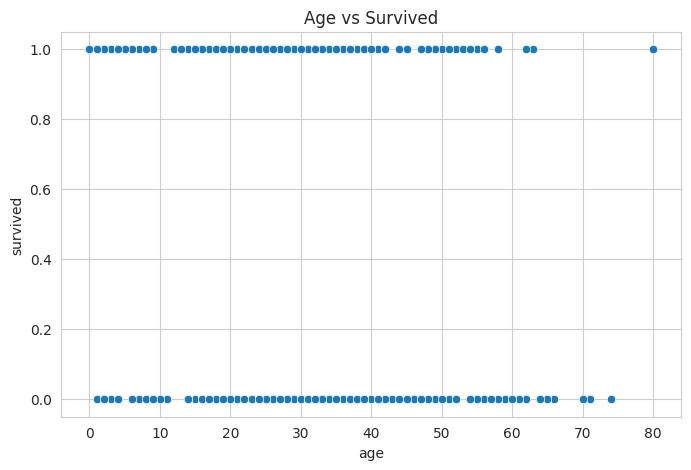

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="age",y="survived",data=df)
plt.title("Age vs Survived")
plt.show()

# Histogram
A histogram:

- breaks a numeric column into bins

- counts how many values fall into each bin

- draws bars to show the distribution



```
0–10 years → how many people?
10–20 years → how many?
20–30 years → how many?
...

```
Each bar height = number of passengers in that age range.

⭐ 2. Why do we use histograms?

Because they help us understand:

✔ Age concentration

Where most people fall.

✔ Skewness

Is the distribution left-skewed or right-skewed?

✔ Shape

Bell curve? Uniform? Two peaks?

✔ Outliers or gaps

Large empty sections show rare ages.

✔ Population structure

Are there more adults? Kids? Seniors?

⭐ 3. What to expect in Titanic's Age Distribution

Typical shape:

- Peak around 20–30 years (young adults)

- Good number of children aged 0–10

- Fewer elderly above 60

- Distribution slightly right-skewed


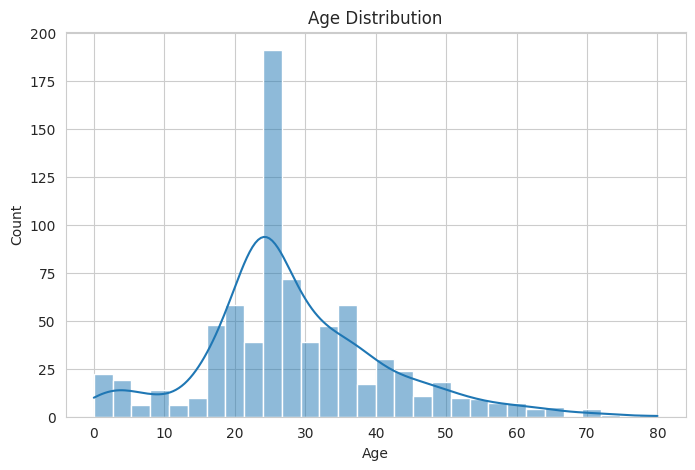

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df["age"],bins=30,kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

"Age distribution on Titanic is right-skewed, with most passengers between 20 and 35 years old. Very few elderly people were on board, and a smaller portion were young children."

## Box Plot
Boxplot: Fare by Passenger Class (Pclass)

⭐ 1. What is a boxplot?

A boxplot shows:

- Median (middle value)

- Quartiles (Q1 and Q3)

- Interquartile range (IQR)

- Outliers (individual extreme points)

It is perfect for comparing numeric values across categories.

Here:

- Category = Pclass

- Value = Fare

⭐ 2. Why we use it?

Because we want to answer:

- Do 1st class passengers pay more?

- How different is 2nd class from 3rd class?

- How many extreme ticket prices exist (outliers)?

A boxplot reveals all of this instantly.

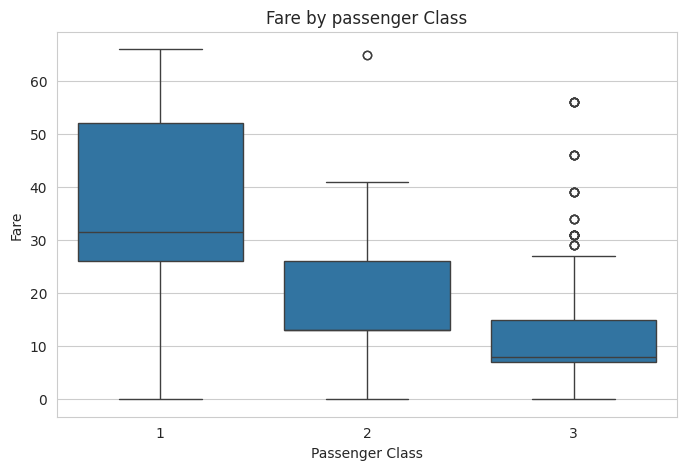

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x="pclass",y="fare",data=df)
plt.title("Fare by passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()

“Fare clearly increases with passenger class. First class shows a wide spread and many high-value outliers, indicating luxury cabins. Second class fares are moderate with smaller variation. Third class fares are low and tightly grouped. This visual confirms strong economic differences between classes.”

# Heatmap
⭐ 1. What is a correlation matrix?

It shows how strongly two numeric variables are related.

Values range from:

- +1 → perfect positive correlation
(if one increases, the other increases)

- –1 → perfect negative correlation
(if one increases, the other decreases)

- 0 → no relationship

Example interpretations:

- If Fare and Pclass are correlated → higher class = higher fare

- If Age and Survived correlate → younger people survived more or less

- If SibSp (siblings onboard) and Survived correlate → families survived differently

The heatmap makes this relationship visual.

⭐ 2. Why use a heatmap?

Because:

✔ It quickly shows which features matter

✔ Helps remove unnecessary features

✔ Helps pick features for ML models

✔ Reveals hidden relationships

✔ Helps detect multicollinearity

Without it, you only guess relationships.

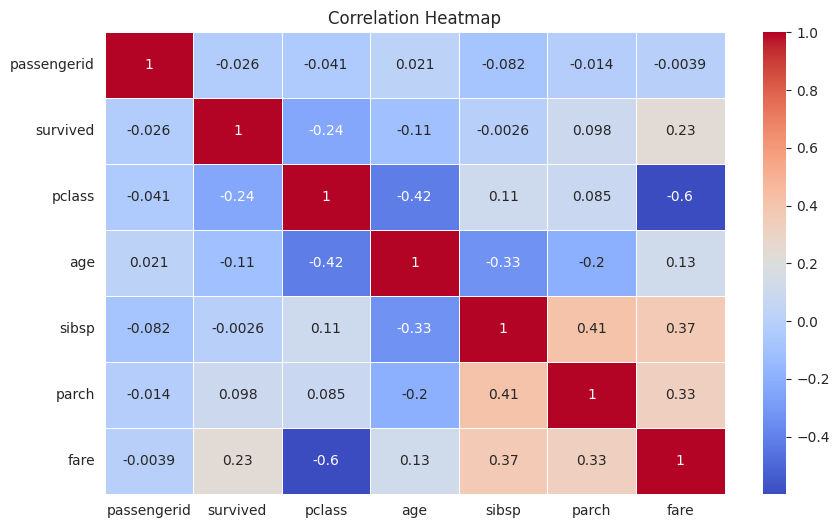

In [9]:
numeric_df = df.select_dtypes(include="number")
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

“The strongest correlation is between passenger class and fare (–0.60), confirming that higher classes paid significantly more. Passenger class also shows a moderate negative correlation with survival (–0.24), indicating higher survival rates for first-class passengers. Family-related variables (SibSp and Parch) show moderate positive correlation (0.41), reflecting family travel patterns. Overall, Pclass and Fare are the most informative features, while Age shows only weak relationships with survival.”

# Countplot
This plot answers a basic but important question:

How many people survived vs died?

It is one of the first plots companies expect in any EDA (Exploratory Data Analysis).

⭐ 1. What is a Countplot?

A countplot simply counts how many rows belong to each category.

Here:

- Category = Survived (0 or 1)

So it shows:

- Bar for 0 → people who died

- Bar for 1 → people who survived

This gives quick insight into the imbalance in the dataset.

⭐ 2. Why Countplot is Important?

Because:

✔ Shows if dataset is balanced or imbalanced

Titanic dataset is imbalanced: more died than survived.

✔ Helps understand survival patterns

Before looking at gender or class, we see overall survival count.

✔ Important for ML models

Imbalanced data affects accuracy.

✔ Shows the tragic scale of the disaster

Most passengers did not survive.

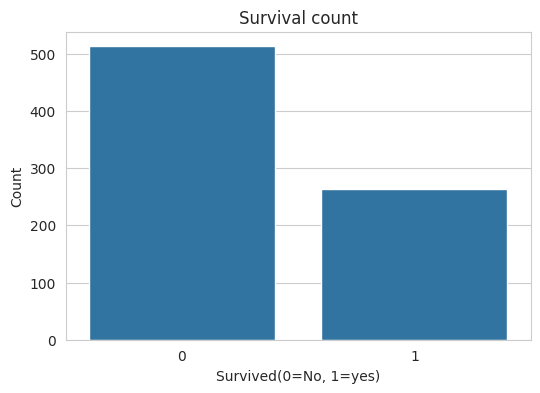

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x="survived", data=df)
plt.title("Survival count")
plt.xlabel("Survived(0=No, 1=yes)")
plt.ylabel("Count")
plt.show()

# Survival by Gender (Countplot with hue="sex")

This is the single most famous finding in Titanic data:

Women had a much higher survival rate than men.

Let’s break it down cleanly.

⭐ 1. What this plot shows

A grouped countplot:

Category on X-axis → Survived (0 or 1)

Bars inside each group → Male and Female

So you will see 4 bars:

| Survived or Not | Male Count | Female Count |
| --------------- | ---------- | ------------ |
| Died (0)        | Tall bar   | Short bar    |
| Survived (1)    | Short bar  | Tall bar     |


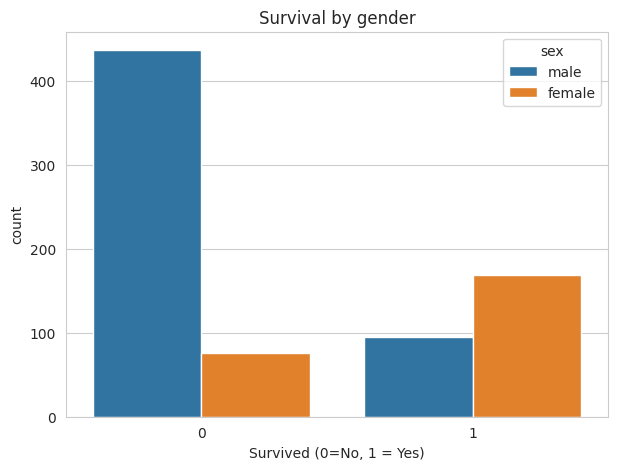

In [11]:
plt.figure(figsize=(7,5))
sns.countplot(x="survived", hue="sex", data=df)
plt.title("Survival by gender")
plt.xlabel("Survived (0=No, 1 = Yes)")
plt.ylabel("count")
plt.show()

⭐ What this means for Data Science / ML
1. Gender is the strongest categorical predictor of survival,
Even stronger than age or fare.

2. Machine learning models improve significantly when sex is included.
3. Gender must be encoded properly (0–1) for ML later.
4. This is the single most important feature for predicting survival.

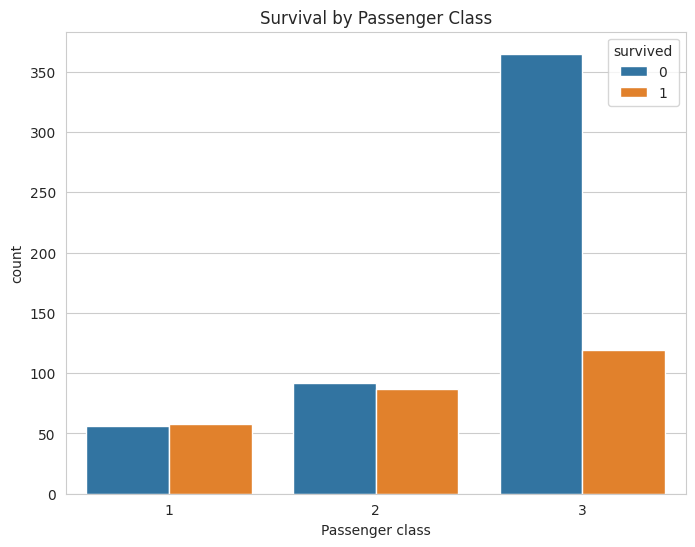

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(x = "pclass", hue="survived" ,data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger class")
plt.ylabel("count")
plt.show()

Wealth and class were major survival factors on the Titanic.
The higher the class, the higher the survival rate.

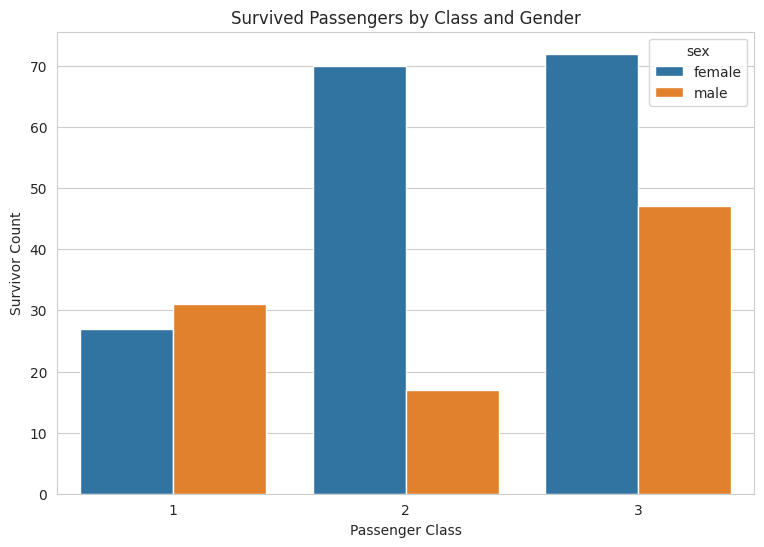

In [13]:
plt.figure(figsize=(9,6))
sns.countplot(x="pclass", hue="sex", data=df[df["survived"] == 1])
plt.title("Survived Passengers by Class and Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Survivor Count")
plt.show()


Survival strongly depended on both gender and class.
Females had the highest survival across every class, with 2nd and 3rd class women surviving in large numbers.
Men, regardless of class, had significantly lower survival, with 2nd class men having the lowest rate.
Gender had a greater influence on survival than socio-economic class.

# A pairplot or jointplot gives a deeper multivariate view of relationships between continuous variables.

⭐ 1. PAIRPLOT — Multivariate Relationship Overview

A pairplot shows:

- Scatterplots for every pair of numeric features

- Histograms on the diagonal

- Can be color-coded by survival

This creates a complete mini-EDA in one figure.

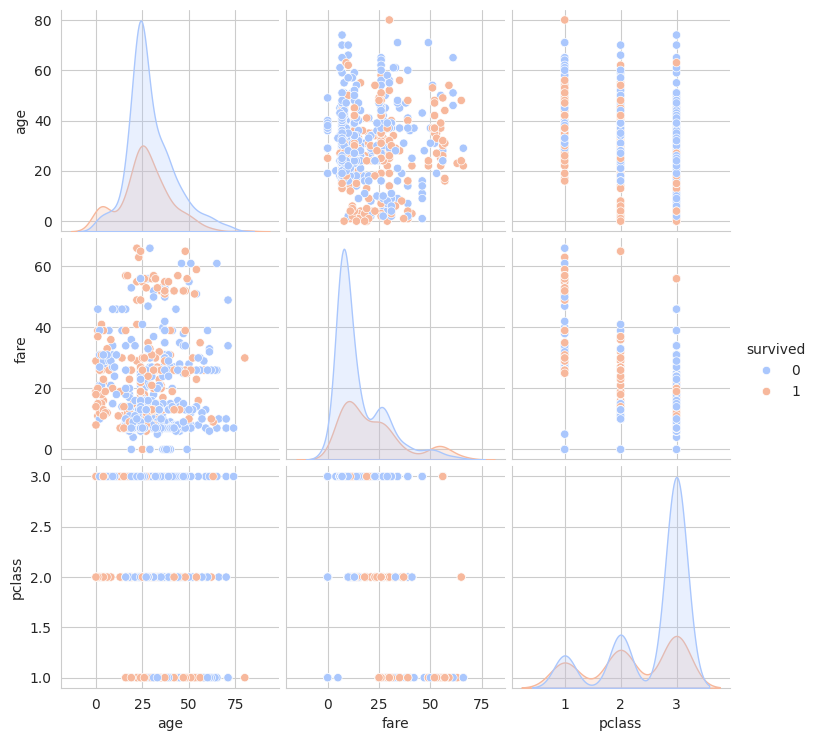

In [14]:
sns.pairplot(
    df[["age", "fare", "pclass", "survived"]],
    hue="survived",
    diag_kind="kde",
    palette="coolwarm"
)
plt.show()


“My pairplot showed that survival correlates strongly with fare and class, but not with age.”

⭐ 2. JOINTPLOT — Deep Dive into Age vs Fare

This allows you to see both:

- distribution

- relationships

- density regions

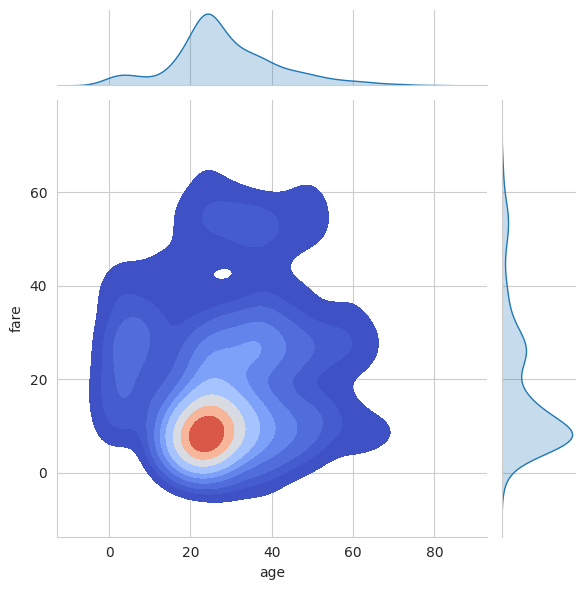

In [15]:
sns.jointplot(
    data=df,
    x="age",
    y="fare",
    kind="kde",
    fill=True,
    cmap="coolwarm"
)
plt.show()


“Jointplot analysis shows Titanic passengers clustered in low-fare ranges, with only a small group of high-fare passengers. These high-fare individuals correlate strongly with 1st class and higher survival rates.”

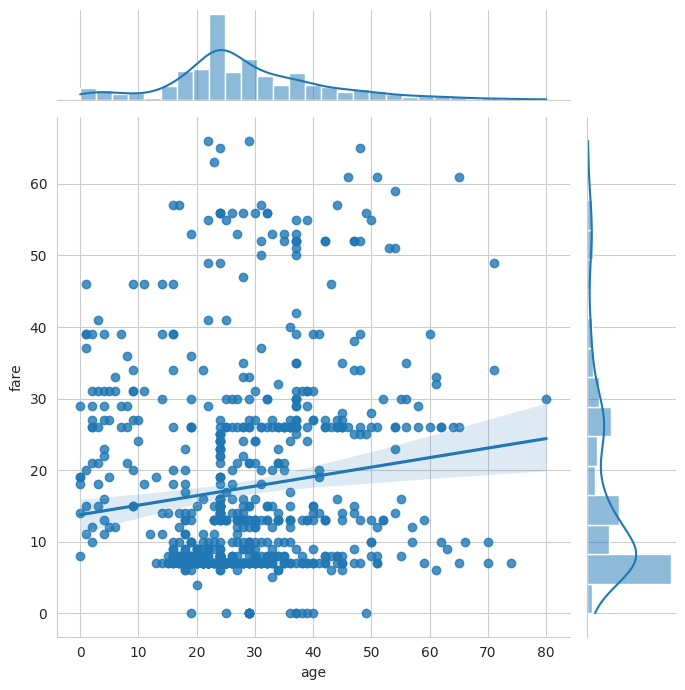

In [16]:
#joint plot with regression line
sns.jointplot(
    data=df,
    x="age",
    y="fare",
    kind="reg",
    height=7
)
plt.show()